In [1]:
import numpy as np
import pandas as pd

# Import the datasets
apple_term_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Term_reduced.csv')
apple_2gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Bigram_reduced.csv')
apple_3gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Trigram_reduced.csv')
apple_4gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-4-gram_reduced.csv')

In [2]:
# Term training data and labels
X_train_term = apple_term_training.iloc[:, :-1].values
y_train_term = apple_term_training.iloc[:, -1].values

# Bigram training data and labels
X_train_2gram = apple_2gram_training.iloc[:, :-1].values
y_train_2gram = apple_2gram_training.iloc[:, -1].values

# 3gram training data and labels
X_train_3gram = apple_3gram_training.iloc[:, :-1].values
y_train_3gram = apple_3gram_training.iloc[:, -1].values

# 4gram training data and labels
X_train_4gram = apple_4gram_training.iloc[:, :-1].values
y_train_4gram = apple_4gram_training.iloc[:, -1].values

Term - Average accuracy: 0.528 (+- 0.026)
Bigram - Average accuracy: 0.541 (+- 0.019)
Trigram - Average accuracy: 0.538 (+- 0.023)
4-gram - Average accuracy: 0.541 (+- 0.023)


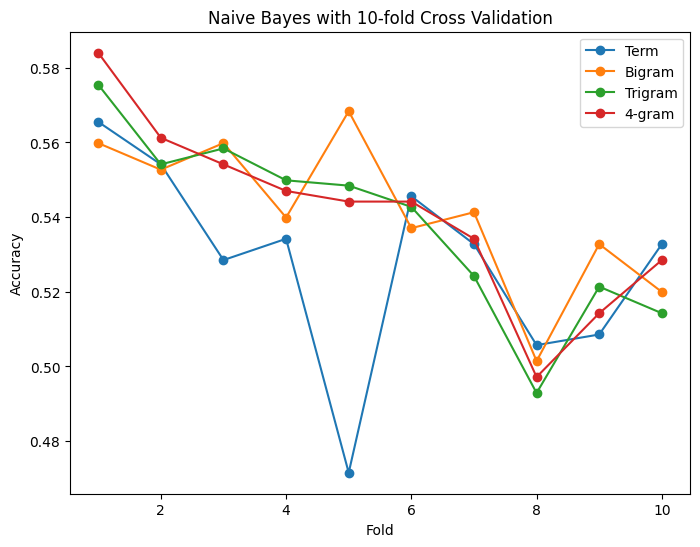


Classification Report (Term):
              precision    recall  f1-score      support
0              0.523587  0.523014  0.523300  3650.000000
1              0.483995  0.484570  0.484282  3370.000000
accuracy       0.504558  0.504558  0.504558     0.504558
macro avg      0.503791  0.503792  0.503791  7020.000000
weighted avg   0.504581  0.504558  0.504570  7020.000000

Classification Report (Bigram):
              precision    recall  f1-score      support
0              0.528822  0.794247  0.634910  3650.000000
1              0.511704  0.233531  0.320701  3370.000000
accuracy       0.525071  0.525071  0.525071     0.525071
macro avg      0.520263  0.513889  0.477806  7020.000000
weighted avg   0.520604  0.525071  0.484072  7020.000000

Classification Report (Trigram):
              precision    recall  f1-score      support
0              0.535664  0.827123  0.650226  3650.000000
1              0.544075  0.223442  0.316786  3370.000000
accuracy       0.537322  0.537322  0.537322    

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

# Adjust pandas display options
pd.options.display.max_columns = None
pd.options.display.width = None

def evaluate_model(n_gram, X_train, y_train, ax):
    model = GaussianNB()
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)
    print(f'{n_gram} - Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
    
    ax.plot(range(1, k+1), scores, '-o', label=n_gram)
    
    y_pred = cross_val_predict(model, X_train, y_train, cv=k)
    report = classification_report(y_train, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    return report_df

k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
fig, ax = plt.subplots(figsize=(8, 6))

n_grams = ['Term', 'Bigram', 'Trigram', '4-gram']
X_train_list = [X_train_term, X_train_2gram, X_train_3gram, X_train_4gram]
y_train_list = [y_train_term, y_train_2gram, y_train_3gram, y_train_4gram]

reports = []
for n_gram, X_train, y_train in zip(n_grams, X_train_list, y_train_list):
    report_df = evaluate_model(n_gram, X_train, y_train, ax)
    reports.append(report_df)

ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title(f'Naive Bayes with {k}-fold Cross Validation')
ax.legend()
plt.show()

# Print classification reports
for n_gram, report_df in zip(n_grams, reports):
    print(f'\nClassification Report ({n_gram}):')
    print(report_df)
